<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 1: What is Machine Learning and how is it related to Physics? 
======

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')


# Simple Regression problem
What do you think "Machine Learning (ML)" is?


Consider the spring example in the notes. 
Let's see how the actual data would look like. 


In [3]:
'''This data is taken from lab report of students in Phys_Lab 3.'''

import io, requests

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Spring.csv'
s=requests.get(url).content
exp_data=pd.read_csv(io.StringIO(s.decode('utf-8')))


exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


### Learning


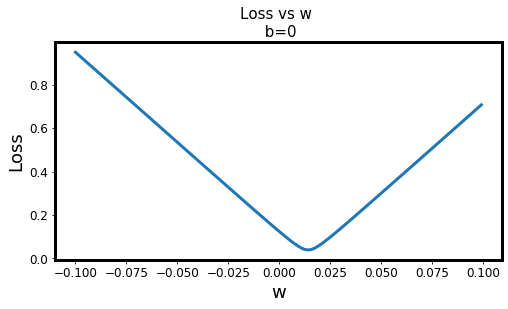

In [ ]:
exp_w_axis = np.arange(-.1,.1, .001)
exp_losses = [loss(exp_data['Force'].values, exp_data['Displacement'].values, w,bias=0 ) for w in exp_w_axis]

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(exp_w_axis, exp_losses)

plt.show()

In [ ]:
'''
Exercise
Do your own code for finding the fit. 

Define the cost function
Minimize it
Find the w that gives the minimum values of the loss. 
'''

exp_min_w = minimize((lambda w: loss(exp_data['Force'].values, exp_data['Displacement'].values, [w[0]],w[1] )),[.1,.1])

print('The slope is {} and the intercept is {}.'.format(*exp_min_w.x))
print('At the minimum, the loss is {}.'.format(loss(exp_data['Force'].values, exp_data['Displacement'].values,[exp_min_w.x[0] ],exp_min_w.x[1]) ) )



The slope is 0.030915352959697547 and the intercept is -0.3559409919353771.
At the minimum, the loss is 0.0007182370023728148.


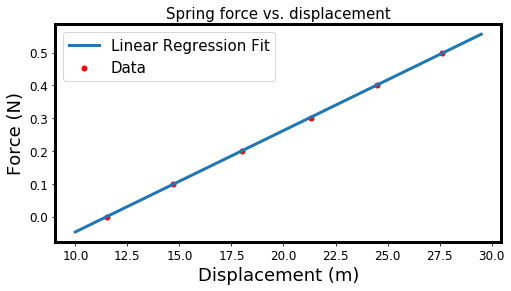

In [ ]:
exp_reg = LinearRegression()
exp_reg.fit(exp_data['Displacement'].values.reshape(len(exp_data),1), exp_data['Force'])
exp_x = np.arange(10,30,.5).reshape(40,1)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot( exp_x , exp_reg.predict( exp_x ) ,label='Linear Regression Fit' )
ax.scatter(exp_data.Displacement , exp_data.Force, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


### Ideal case: Simple data and simple model
We start with some synthetic data with no noise.


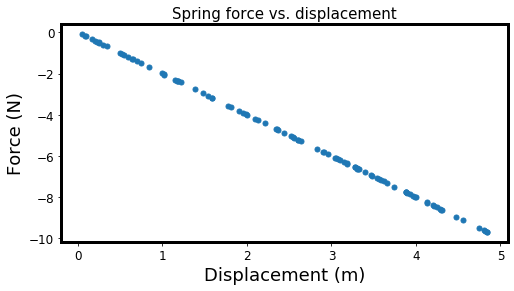

In [ ]:
def spring_F(k, n_samples=100,x_max = 5):
    x_list = np.random.uniform(0,x_max,n_samples)
    return x_list.reshape(n_samples,1) , -k*np.abs( x_list ).reshape(n_samples,1)

x_list , spring_force_list = spring_F(2,)
x_label = 'Displacement (m)'
y_label = 'Force (N)'
plt_title = 'Spring force vs. displacement'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(x_list , spring_force_list)
plt.show()
# plt.close()

### Training an agent to estimate the force
Let's assume that we don't know where and how this data is generated/collected and want to find the model that estimates the force. 

In [ ]:
'''
This function gives the loss of a linear estimate of the data. 
That is, it assumes that the there is a f(x) = w.x + b. 
In the input, we take 
y_list [n_sample,1]
x_list [n_sample, n_params]
w_list [n_params, 1]: w for each parameters
bias : [1,1], bias

It calculates the f(x) and compares it to the y_list. 
'''

def loss(y_list, x_list, w_list, bias=0):
    n_sample = len(y_list)
    y_list = y_list.reshape(n_sample,1)
    x_list = x_list.reshape(n_sample,1)
#     print(y_list.shape, x_list.shape)
    f_list =  ( np.dot(x_list, w_list ) + bias ).reshape( len(y_list)  , 1 )
    return np.sqrt( np.sum(  ( y_list - f_list )**2 )   )/n_sample


def simplified_loss(w, b=0):
    return loss(spring_force_list , x_list, w, b)

In [ ]:
loss(spring_force_list, x_list, [1],0)

0.8632274126650556

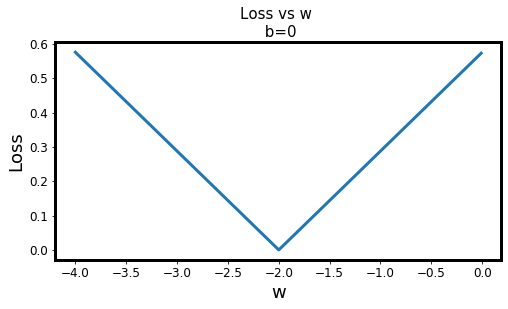

In [ ]:
'''
Now let's try different values of w for our data and see 
if we can minimize the loss. 
'''

w_axis = np.arange(-4,0, .01)
losses = [simplified_loss(w, b=0) for w in w_axis]

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(w_axis, losses)

plt.show()

In [ ]:
'''
Now let's use an optimizer to find the 
w just by looking at the data. 
'''
from scipy.optimize import minimize

In [ ]:
min_w = minimize( (lambda w: loss(spring_force_list, x_list, [w[0]],w[1] )),[.1,.1])

print('The slope is {} and the intercept is {}.'.format(*min_w.x))
print(f'At the minimum, the loss is {simplified_loss([min_w.x[0] ],min_w.x[1])}.' )

The slope is -2.000000021521594 and the intercept is 4.610392623437665e-08.
At the minimum, the loss is 3.141923738819333e-09.


### Using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

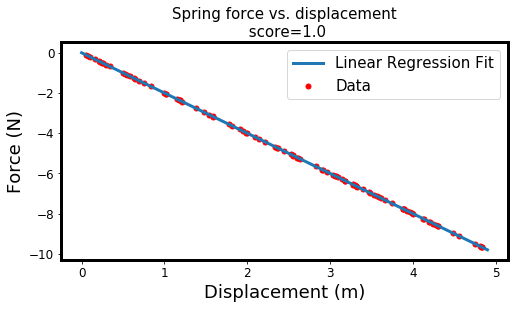

In [ ]:
'''
We first train an estimator which  finds a good fit to the data.
'''

reg = LinearRegression()  ## Defines/Constructs the estimator
reg.fit(x_list, spring_force_list)  ##Trains the estimator

x = np.arange(0,5,.1).reshape(50,1)  

### Now we plot the 
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title + 
                     '\n score=' + str( reg.score(x_list, spring_force_list) ) )

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


# Complexity

Can't we just do what we used to do? Just find the cause and effect relation and establish the laws that governs the physics?

The challenge is that it is usually not this simple to establish the connection between the quantity of interest and parameters that define the problem. For instance, we could have

- Complex non-linearities in the problem
- Too many parameters involved


## Non-linearity 

### A little bit of non-linearity
What if the data is not at simple as we saw above. What happens then?
Here simulate the position of a particle under acceleration with some initial velocity and some initial position and collect the data of the x(t). 


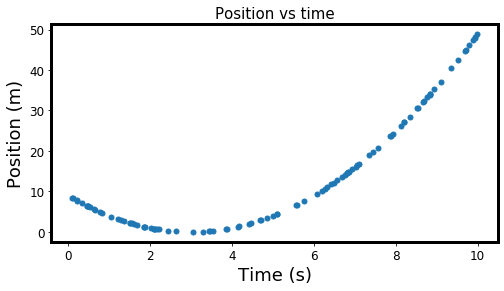

In [ ]:
'''
This takes the acceleration, velocity and position of a particle and 
returns random instances of the position in time, i.e. {t, x(t)}
'''

def position(a, v=0, x0=0, n_samples=100, t_max=5):
    t_list = np.random.uniform(0,t_max,n_samples)
    return t_list.reshape(n_samples,1) , (1/2*a*t_list**2 + v*t_list+x0).reshape(n_samples,1)

t_list , pos_list = position(2,v=-6,x0=9, t_max=10)
x_label = 'Time (s)'
y_label = 'Position (m)'
plt_title = 'Position vs time'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(t_list , pos_list)
plt.show()

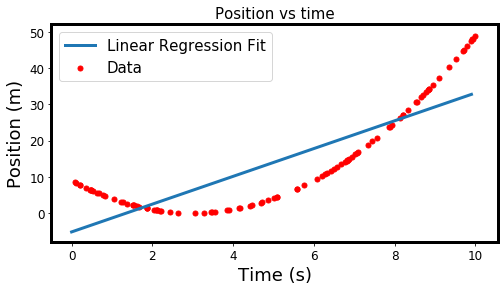

In [ ]:
'''
Just as we did before, we can find a linear fit to the data. 
As you can see, it is not a good fit. 
'''

reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

### Exercise: 

Calculate the loss for this.

Hint: Use reg_nl.coef_ and reg_nl.intercept to find the slope and the intercept. 

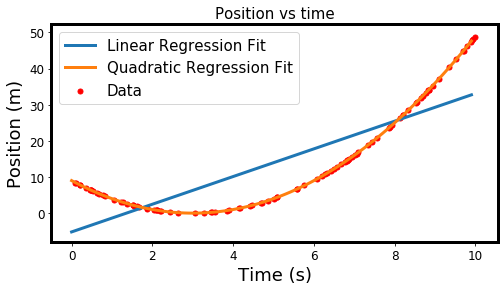

CPU times: user 261 ms, sys: 109 ms, total: 370 ms
Wall time: 261 ms


In [ ]:
%%time
## This line is to keep track of the time duration of the calculation. 



reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)
n_s = len(t_list)

'''
We add a second fit where it includes the quadratic terms. This would give 
a poly(2) model. It is clearly giving a better fit. Calculate the loss. 
'''
reg_nl2 = LinearRegression()
reg_nl2.fit(         np.hstack([t_list, t_list**2])      , pos_list)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( np.hstack([x,x**2]) ) ,label='Quadratic Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

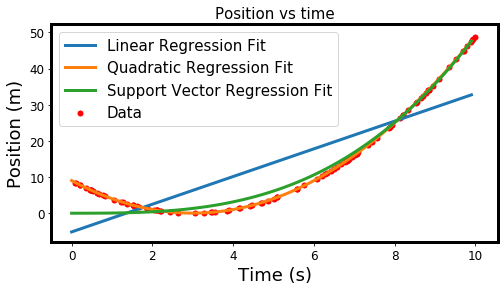

CPU times: user 275 ms, sys: 102 ms, total: 377 ms
Wall time: 265 ms


In [ ]:
%%time

reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

'''
This is the same as the one before, except that now we use a built-in function 
to do the transformation of the features. 
'''

from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=3 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform.fit_transform(t_list)      , pos_list)


'''
We use another technique for regression here. We'll talk more about this. 
The nice this here is that there is no need for transformation of the input. 
'''
from sklearn.svm import SVR
svr_nl = SVR(kernel='poly')
svr_nl.fit(t_list, pos_list.reshape(n_s, ) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, svr_nl.predict( x ) ,label='Support Vector Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

### Black-body radiation


Now we will investigate the black-body radiation problem. 
This is to some extent what Max Planck did in the early 1900, 
except he did not have access to computer or machine-learning tools. 
We use the experimental data collected in a physics lab.


In [ ]:
## This data is collected from galileo.phys.virginia.edu/classes/252
# bbr_data_url = "http://galileo.phys.virginia.edu/classes/252/bbr.xls"
bbr_data_url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Lec_1/bbr.xls?raw=true"

bbr_data = pd.read_excel(bbr_data_url)

bbr_data.head()

,0,T,0.1,T/2,0.2
0,88182000000,2.978514e-23,2.997673e-23,1.478758e-23,1.498837e-23
1,176364000000,1.183007e-22,1.199069e-22,5.831636e-23,5.995346e-23
2,264546000000,2.642956e-22,2.697906e-22,1.293533e-22,1.348953e-22
3,352728000000,4.665309e-22,4.796277e-22,2.266891e-22,2.398138e-22
4,440910000000,7.237795e-22,7.494183e-22,3.491384e-22,3.747091e-22


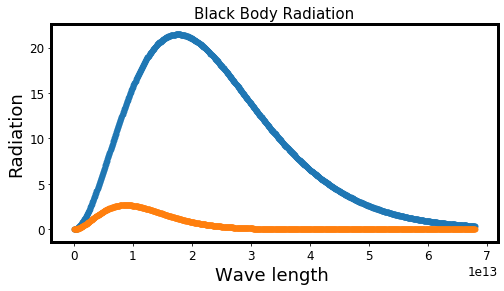

In [ ]:
n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(bbr_data[0][::n_s_rate], 10**20*bbr_data['T'][::n_s_rate])
ax.scatter(bbr_data[0][::n_s_rate], 10**20*bbr_data['T/2'][::n_s_rate])
plt.show()

In [ ]:
'''
Exercise:
Find a fit and plot them along side the data. 

- Define X,Y
- Use SVR to find a fit
- Plot it with the data
'''
X = bbr_data[0].values.reshape(len(bbr_data),1)
Y = 10**17*bbr_data['T'].values#.reshape(len(bbr_data),1)


In [ ]:
%%time
bbr_reg = SVR(kernel='poly')
bbr_reg.fit(X,Y)
print(bbr_reg.score(X,Y) )

-0.055940705257694116
CPU times: user 3.06 ms, sys: 862 µs, total: 3.92 ms
Wall time: 2.89 ms


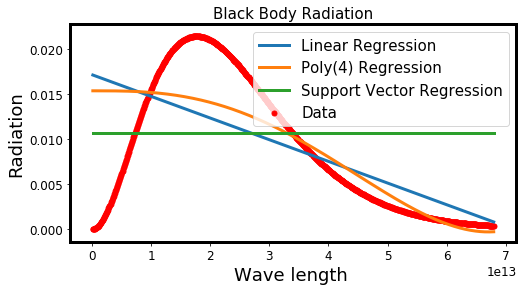

CPU times: user 284 ms, sys: 95.4 ms, total: 379 ms
Wall time: 264 ms


In [ ]:
%%time

## The linear model
bbr_reg_lin = LinearRegression()
bbr_reg_lin.fit( X , Y )


## The polynomial model
pl_deg=4
from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=pl_deg )
bbr_reg_poly = LinearRegression()
bbr_reg_poly.fit(       polytransform.fit_transform( X )      , Y )


## The SVM model with kernel
## You can see that this is not good
from sklearn.svm import SVR
bbr_reg_svr = SVR(kernel='rbf', gamma=10)
bbr_reg_svr.fit(X,Y)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(X, bbr_reg_lin.predict( X ) ,label='Linear Regression' )
ax.plot(X, bbr_reg_poly.predict( polytransform.fit_transform(X) ) ,label=f'Poly({pl_deg}) Regression' )
ax.plot(X, bbr_reg_svr.predict( X ) ,label='Support Vector Regression' )
ax.scatter(X ,Y, color='r',label='Data' )
ax.legend(loc=1)
plt.show()

### Exercise

Why do you think this is not working well?

Can you think of an algorithm that does this better?


## High dimensionality
Another form of complexity is when we are investigating a property of the system that depends or is realted to too many parameters. 
Even if the dependence is linear on each one of them, it still would be challenging to resolve the role that each one of them is playing. 

### Ground state energy of complexy molecules
Here we investigate the ground state enery of moecules. This is in general a challenging problem. Here we use the data from some simulations for different molecules. 
=> Coulomb matrix



In [ ]:
import io, requests, zipfile

In [ ]:
'''
We need to first import the data. I took the data from kaggle datasets. 
This is ground state energy of some molecules based on their different 
chemical bounds. 
'''

url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,6.134338,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,6.974135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,2.897620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,5.175577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,2.895051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


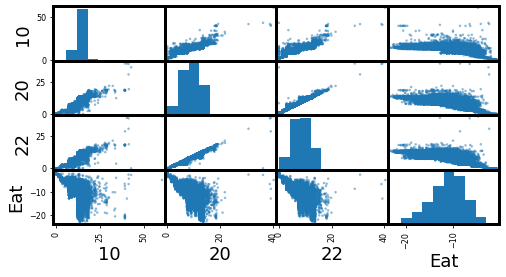

In [ ]:
pd.plotting.scatter_matrix(data[['10','20','22', 'Eat']])
plt.show()

In [ ]:
print(data.columns[-4:])
data.drop('pubchem_id',axis=1, inplace=True)
data.columns[-4:]

Index(['1273', '1274', 'pubchem_id', 'Eat'], dtype='object')


Index(['1272', '1273', '1274', 'Eat'], dtype='object')

In [ ]:
Y = data['Eat'].values
X = data.drop('Eat',axis=1).values

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
%%time
reg1 = LinearRegression(n_jobs=4)
reg1.fit(X,Y)


CPU times: user 6.97 s, sys: 309 ms, total: 7.28 s
Wall time: 3.79 s


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)


In [ ]:
%%time
reg1 = LinearRegression(n_jobs=4)
reg1.fit(X_train,Y_train)
print('The score on the training set is: '+str(reg1.score(X_train,Y_train)) )
print('The score on the test set is: '+str(reg1.score(X_test,Y_test)))

The score on the training set is: 0.9705350601062441
The score on the test set is: -292.5010295176856
CPU times: user 5.52 s, sys: 371 ms, total: 5.89 s
Wall time: 3.09 s


In [ ]:
%%time
reg2 = Lasso()
reg2.fit(X_train,Y_train)
print('The score on the training set is: '+str(reg2.score(X_train,Y_train)) )
print('The score on the test set is: '+str(reg2.score(X_test,Y_test)))

The score on the training set is: 0.8250925259752339
The score on the test set is: 0.8310620350483154
CPU times: user 1.05 s, sys: 138 ms, total: 1.19 s
Wall time: 683 ms


In [ ]:
%%time
reg3 = Ridge()
reg3.fit(X_train,Y_train)
print('The score on the training set is: '+str(reg2.score(X_train,Y_train)) )
print('The score on the test set is: '+str(reg2.score(X_test,Y_test)))

The score on the training set is: 0.8250925259752339
The score on the test set is: 0.8310620350483154
CPU times: user 1.6 s, sys: 266 ms, total: 1.86 s
Wall time: 1.02 s


### Exercise

Plot these differnt fits/regressions. 


What if we add noise? How would the polynomial regression work?

# Robustness: What happens if there's a bit of noise?
Let's add some noise to the data, also for simplicity, assume that the noise is gaussian. Let's see what you get!

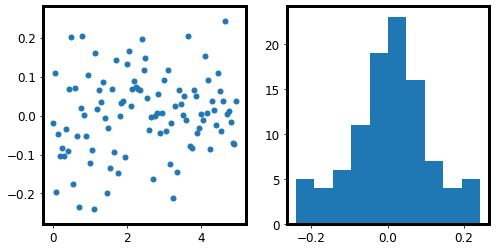

In [ ]:
'''
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100
x = np.arange(0,5,5/n_s).reshape(n_s,1)
noise = g_noise(0,.1,len(x)).reshape(n_s,1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x, noise)

ax2.hist(noise)

plt.show()
plt.tight_layout()
plt.close()

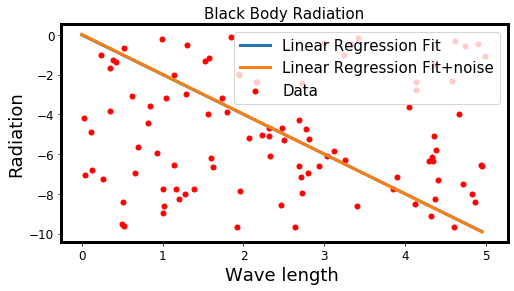

In [ ]:
n_s = 100
x_list, noisy_f_list =  spring_F(2,n_samples=n_s)
noisy_f_list += noise

reg2 = LinearRegression()
reg2.fit(x_list, noisy_f_list)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg2.predict( x ) ,label='Linear Regression Fit+noise' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


# plt.plot(x, reg.predict( x ) , color='b')
# plt.plot(x, reg2.predict( x ) , color='g')
# plt.scatter(x_list , f_list, color='r')
# plt.show()
# plt.close()


Is this always the case?
Under what conditions?

### Noise + complexity
Would the situation be as simple if we had noise on top of a non-linear model?

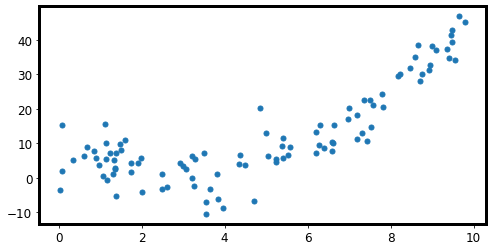

In [ ]:
'''
We use the same noise function as before: 
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100  ## Number of sample points
x_max = 10
x = np.arange(0,x_max,x_max/n_s).reshape(n_s,1)
noise = g_noise(0,5,len(x)).reshape(n_s,1)

'''We generate the data and add the noise to the position measurements. '''
t_list , pos_list = position(2,v=-6,x0=9, t_max=10, n_samples=n_s)
noisy_pos_list = pos_list+noise

plt.scatter(t_list, noisy_pos_list)
plt.show()

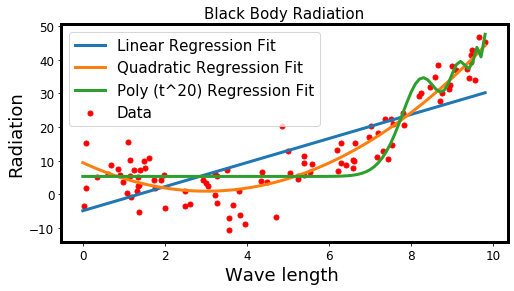

In [ ]:
x = np.arange(0,x_max-.1,x_max/n_s).reshape(-1,1)


reg_nl = LinearRegression()
reg_nl.fit(t_list, noisy_pos_list)


polytransform2 = PolynomialFeatures(degree=2 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform2.fit_transform(t_list)      , noisy_pos_list)

polytransform20 = PolynomialFeatures(degree=50 )
reg_nl20 = LinearRegression()
reg_nl20.fit(       polytransform20.fit_transform(t_list)      , noisy_pos_list)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform2.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, reg_nl20.predict( polytransform20.fit_transform(x) ) ,label='Poly (t^20) Regression Fit' )
ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

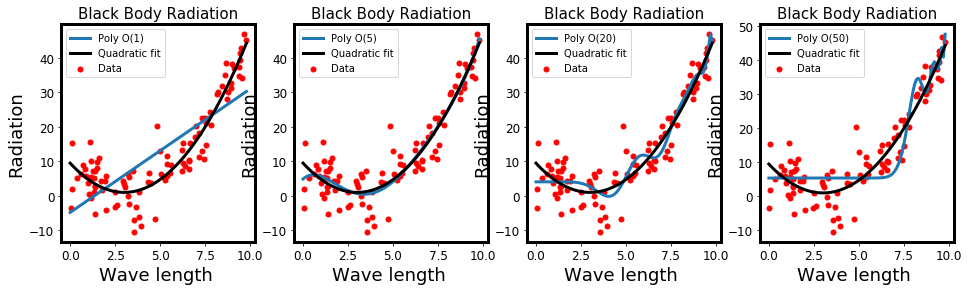

In [ ]:
####### Add column to account for different values of sigma
####### Add the information about the score and validation info. 

fig = plt.figure(figsize=(16,4))
degrees = [1, 5, 20, 50]

quad_polytransform = PolynomialFeatures(degree=2 )
reg_quad = LinearRegression()
reg_quad.fit(       quad_polytransform.fit_transform(t_list)      , noisy_pos_list)


for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1, xlabel=x_label, ylabel=y_label, title=plt_title)
    polytransform = PolynomialFeatures(degree = degrees[i] )
    reg = LinearRegression()
    reg.fit(  polytransform.fit_transform(t_list)      , noisy_pos_list)
    
    ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
    ax.plot(x, reg.predict( polytransform.fit_transform(x) ) ,label='Poly O('+str(degrees[i])+')' )
    ax.plot(x, reg_quad.predict( polytransform2.fit_transform(x) ) ,label='Quadratic fit', color='black')
    ax.legend(loc=0, fontsize = 10)

plt.tight_layout
plt.show()

### Exercise

What is wrong with increasing the degree of the polynomial? 